In [ ]:
# Loading And First Look
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load the data set
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")

In [ ]:
# Basic Dataset information

df.shape

In [ ]:
df.columns.tolist()


In [ ]:
df.head()

In [ ]:
# Data Quality Assessment

df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
# Check For Duplicates

df.duplicated().sum()

In [ ]:
#basic Statistics

df.describe()

In [ ]:
#data Processing
df.columns = df.columns.str.strip()

In [ ]:
# Convert Entry Column to datatime
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

In [ ]:
df.dtypes


In [ ]:
# Create valuation Growth Matrics

df['Valuation_Growth']=df['Valuation ($B)']/ df['Entry Valuation^^ ($B)'].shift(1)
df.head()

In [ ]:
#Extra Primary City(Before'/')

df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

In [145]:
#count Number of Investors

df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Inventor_Count,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,NaN,Bangalore,3,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,2.400000,Delhi,5,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,8.888889,Noida,4,4


In [ ]:
#Univariate analysis

plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='red')
plt.title('Distribution Of Current Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,len(sector_counts)))
plt.pie(sector_counts,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution Of unicorns by Sector',fontsize=10,fontweight='bold')
plt.axis('equal')
plt.show()


In [ ]:
def display_top_k_sectors(df,k):
    sector_counts = df['Sector'].value_counts()

    #select top k sectorsd anfd groups the rest as other
    if k<len(sector_counts):
        top_sectors = sector_counts.head(k)
        other_sectors = sector_counts.iloc[k:].sum()
        top_sectors['Other']=other_sectors
    else:
        top_sectors = sector_counts

    plt.figure(figsize=(12,8))
    colors = plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
    plt.pie(top_sectors,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
    plt.title(f'distribution of top{k} unicorn sectors',fontsize=10,fontweight='bold')
    plt.axis('equal')
    plt.show()

#call the function with k=5 to display top 65 sectors
display_top_k_sectors(df,10)


In [ ]:
#top sector bar chart
plt.figure (figsize=(12,8))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color=plt.cm.Set3(np.linspace(0,1,len(top_sectors))))
plt.title('top 10 sectors by number of unicorn',fontsize=10,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='right')
for bar,values in zip (bars,top_sectors.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(values),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
#Geographic Distribution

plt.figure(figsize=(14,6))
city_counts = df['Primary_City'].value_counts().head(10)
bars =plt.bar(city_counts.index, city_counts.values,color='red')
plt.title('Top Cities with the Most Unicorns',fontsize=10,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#Add value label
for bar,value in zip(bars,city_counts.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()


In [ ]:
#Create A summary table
city_summary = df.groupby("Primary_City").agg({
    'Valuation ($B)':['count','sum','mean'],
    'Entry_Year':['max','min']
}).round(2)
city_summary.columns = ['Count','Total Valuation','Average Valuation','First_Entry','Last_Entry']
city_summary.head(10)

In [ ]:
#Temporal Analysis

yearly_entries= df['Entry_Year'].value_counts().sort_index()
bars= plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')
plt.title('Number of Unicorns Entered Each Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#Add value labels
for bar,value in zip(bars,yearly_entries.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,color='green')
plt.title('cumulative Unicorns over year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True,alpha=0.3)
plt.show()

In [ ]:
#average Valuation  by year
avg_val_by_year= df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='yellow')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.show()

In [ ]:

def display_k_sector_evolution(df,k):
    #groupby year sector,count occurances
    sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

    #select top k sectors based on overall count
    top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
    sector_year=sector_year[top_k_sectors_names]
    plt.figure(figsize=(15,8))
    sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())
    plt.title(f'Evolution Of Top {k} Sectors Over the Time',fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Unicorns')
    plt.legend(title='Sector',loc='upper left',bbox_to_anchor=(1.05,1))
    plt.yticks(range(0,sector_year.values.max()+5))
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

#Call the functions with k=5
display_k_sector_evolution(df,5)

In [ ]:
#Valuation vs Sector analysis

avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)

bars = plt.bar(range(len(avg_valuation)),avg_valuation.values,color='orange')
plt.title('Average Valuation by Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

In [ ]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)' : ['count','sum']
}).round(2)
sector_summary.columns = ['counts','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary.index))
width=0.35

plt.bar(x-width/2,sector_summary['counts'].values,width,label='Count',color='pink')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (+10)',color='lightblue')
plt.title('Sector performance:Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation (+10)')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

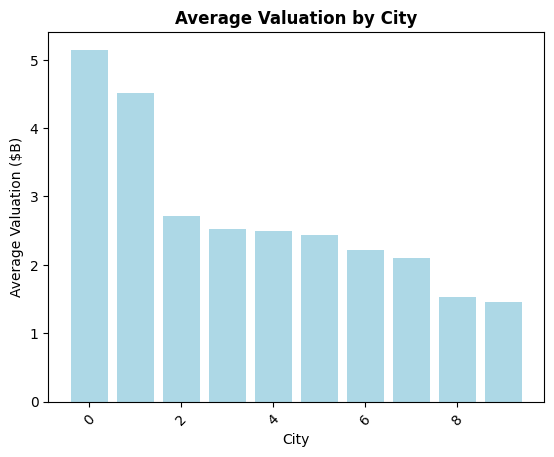

In [125]:
# Geographics vs Valuation analysis

city_valuation = df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation= city_valuation.sort_values(ascending=False).head(10)

bars = plt.bar(range(len(city_valuation)),city_valuation.values,color='lightblue')
plt.title('Average Valuation by City',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

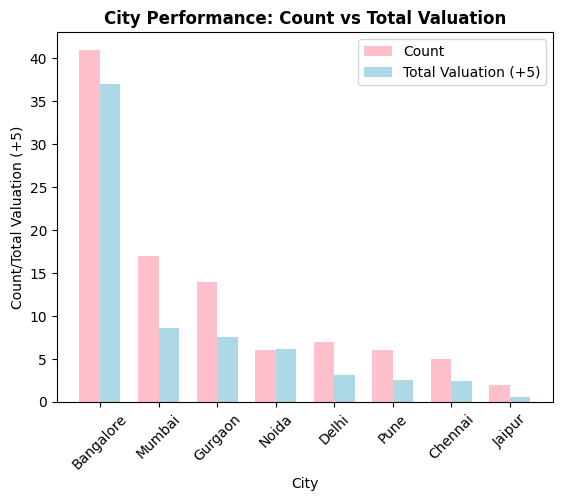

In [130]:
#City vs Count vs Total Valuation

city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
city_summary.columns=['counts','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(8)
x=np.arange(len(city_summary.index))
width=0.35

plt.bar(x-width/2,city_summary['counts'],width,label='Count',color='pink')
plt.bar(x+width/2,city_summary['Total_Valuation']/5,width,label='Total Valuation (+5)',color='lightblue')
plt.title('City Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation (+5)')
plt.xticks(x,city_summary.index,rotation=45)
plt.legend()
plt.show()

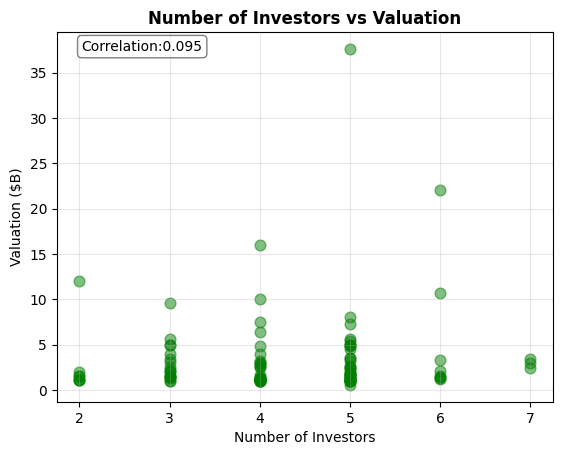

In [147]:

plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.5,s=60,color='green')
plt.title('Number of Investors vs Valuation',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)

correlation = df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.show()

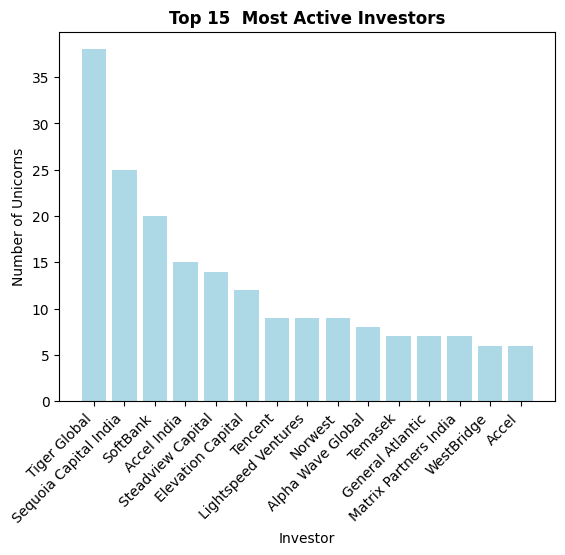

In [126]:
all_investors=[]
for investors in df['Select Investors'].dropna():
    all_investors.extend(inv.strip() for inv in investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='lightblue')
plt.title('Top 15  Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

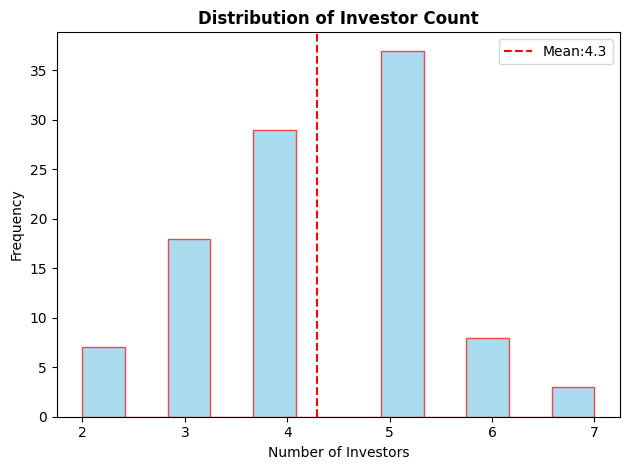

In [149]:
#investor count distribution
plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='skyblue',edgecolor='red')
plt.title('Distribution of Investor Count',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='dashed',label=f'Mean:{df["Inventor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()